# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web

C:\Users\giuse\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Stock data

In [5]:
stock = 'XOM'
data_source='yahoo'
start = '2012-01-01'
end = '2020-09-20'

In [6]:
df = web.DataReader(stock, data_source , start , end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,86.669998,85.900002,85.970001,86.000000,20906800.0,62.067909
2012-01-04,86.150002,85.099998,85.790001,86.019997,16130900.0,62.082344
2012-01-05,85.949997,84.919998,85.639999,85.760002,17452800.0,61.894691
2012-01-06,86.000000,85.110001,85.919998,85.120003,15942100.0,61.432777
2012-01-09,85.639999,84.970001,85.000000,85.500000,11664200.0,61.707050
...,...,...,...,...,...,...
2020-09-14,37.009998,36.490002,36.910000,36.660000,26129900.0,36.660000
2020-09-15,37.380001,36.209999,36.799999,36.270000,23724200.0,36.270000
2020-09-16,38.150002,36.270000,36.459999,37.810001,30890900.0,37.810001


Text(0, 0.5, 'Close Price in USD')

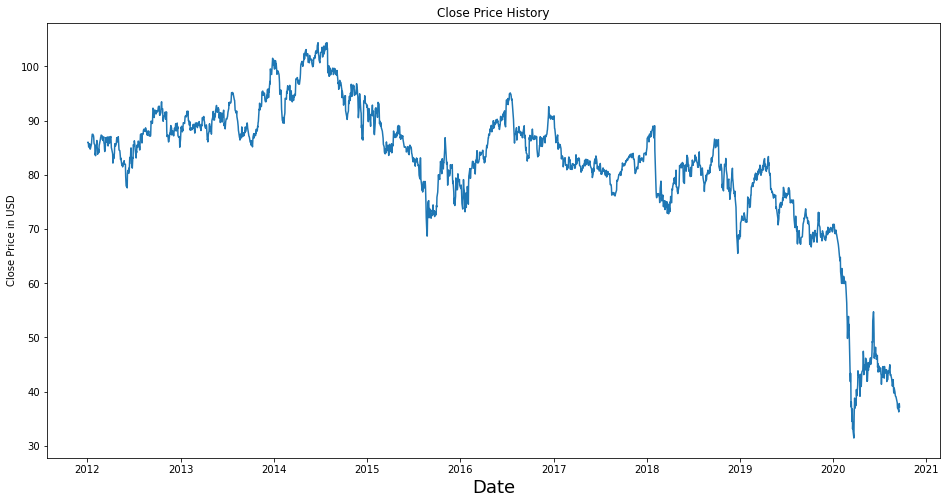

In [7]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price in USD')

In [8]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
data.head()

,Close
Date,
2012-01-03,86.000000
2012-01-04,86.019997
2012-01-05,85.760002
2012-01-06,85.120003
2012-01-09,85.500000


# Returns

In [12]:
# Returns
def calculate_returns(close):
    """
    Compute returns for each ticker and date in close.
    
    Parameters
    ----------
    close : DataFrame
        Close prices for each ticker and date
    
    Returns
    -------
    returns : DataFrame
        Returns for each ticker and date
    """
    # TODO: Implement Function
    
    return (close - close.shift(1))/close.shift(1)

In [13]:
ret = calculate_returns(data)

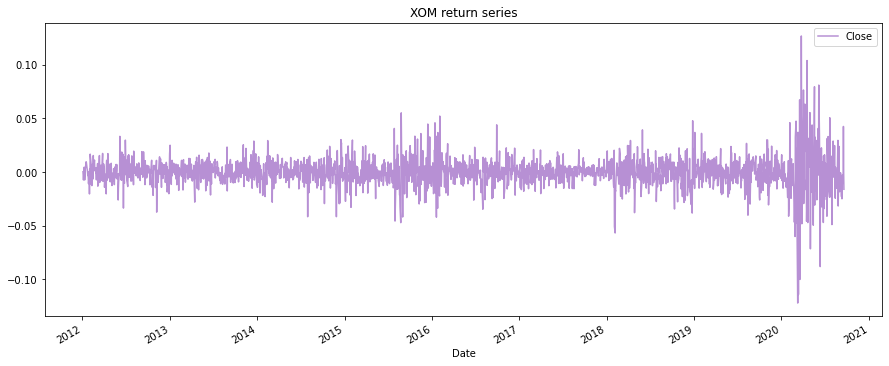

In [18]:
ret.plot(figsize=(15,6), color=sns.xkcd_rgb["pale purple"], title="{} return series".format(stock))
plt.show()

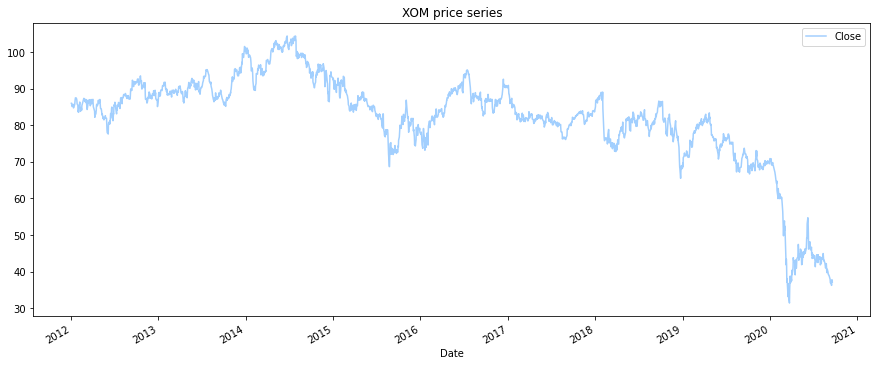

In [17]:
data.plot(figsize=(15,6), color=sns.xkcd_rgb["baby blue"], title="{} price series".format(stock))
plt.show()

# log returns

In [20]:
lret = np.log(data) - np.log(data.shift(1))
lret = lret[1:]

# Autocorrelation

In [21]:
from statsmodels.graphics.tsaplots import plot_acf

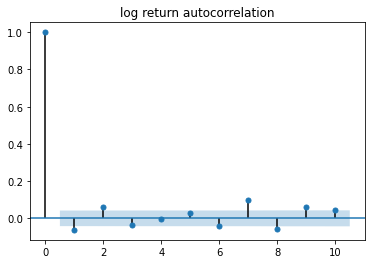

In [22]:
_ = plot_acf(lret,lags=10, title='log return autocorrelation')

# Plot parial autocorrelation

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf

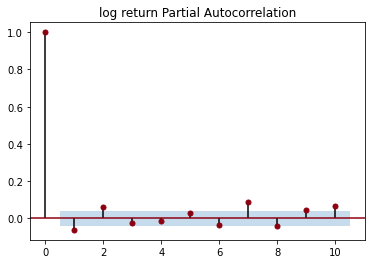

In [24]:
_ = plot_pacf(lret, lags=10, title='log return Partial Autocorrelation', color=sns.xkcd_rgb["crimson"])

# Ljung-Box Test

The Ljung-Box test helps us check whether the lag we chose gives autocorrelations that are significantly different from zero.  The null hypothesis is that the previous lags as a whole are not correlated with the current period.  If the p-value is small enough (say 0.05), we can reject the null and assume that the past lags have some correlation with the current period.

```

returns:
lbvalue (float or array) – test statistic
pvalue (float or array) – p-value based on chi-square distribution
... (we'll ignore the other outputs, which are for another similar hypothesis test)
```

In [25]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [26]:
lb_test_stat, lb_p_value = acorr_ljungbox(lret,lags=20)
lb_p_value

C:\Users\giuse\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


array([3.54373190e-03, 1.71366892e-04, 1.68894331e-04, 4.84136416e-04,
       6.34787140e-04, 3.06365923e-04, 1.03499560e-07, 1.27047033e-08,
       9.22321411e-10, 2.91696995e-10, 6.75093827e-10, 1.71003125e-09,
       1.58033754e-11, 3.78788849e-12, 2.09199733e-12, 4.47645777e-12,
       9.21860887e-12, 8.56246948e-13, 3.75286756e-13, 8.11611864e-13])

# Fit an ARMA model

For the purpose of familiarizing ourselves with the ARMA model, we'll fit the model to our simulated return series.

We'll just use one lag for the autoregression and one lag for the moving average.  
Check out the [statsmodel arma](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARMA.html) documentation.

In [27]:
from statsmodels.tsa.arima_model import ARMA

In [28]:
AR_lag_p = 1
MA_lag_q = 1
order = (AR_lag_p, MA_lag_q)
arma_model = ARMA(lret.values, order=order)
arma_result = arma_model.fit()
arma_pred = pd.Series(arma_result.fittedvalues)

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.